In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate #fungsi baru
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [4]:
df = pd.read_csv('Coffe_sales.csv')

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
# Lets looking how many values in each columns

df2 = df.drop(columns=['Time', "Date","Monthsort", "Weekdaysort"])


for col in df2.columns:
    print(f'\n === {col} ===')
    print(tabulate(df2[col].value_counts().reset_index(),
                  headers=[col, "count"],
                  tablefmt='pretty'
                  ))


 === hour_of_day ===
+----+-------------+-------+
|    | hour_of_day | count |
+----+-------------+-------+
| 0  |     10      |  328  |
| 1  |     11      |  283  |
| 2  |     16      |  278  |
| 3  |      9      |  242  |
| 4  |     12      |  241  |
| 5  |     17      |  237  |
| 6  |     15      |  236  |
| 7  |      8      |  235  |
| 8  |     19      |  229  |
| 9  |     13      |  225  |
| 10 |     14      |  225  |
| 11 |     18      |  218  |
| 12 |     21      |  195  |
| 13 |     20      |  169  |
| 14 |     22      |  113  |
| 15 |      7      |  88   |
| 16 |      6      |   5   |
+----+-------------+-------+

 === cash_type ===
+---+-----------+-------+
|   | cash_type | count |
+---+-----------+-------+
| 0 |   card    | 3547  |
+---+-----------+-------+

 === money ===
+----+-------+--------+
|    | money | count  |
+----+-------+--------+
| 0  | 35.76 | 1014.0 |
| 1  | 32.82 | 490.0  |
| 2  | 25.96 | 459.0  |
| 3  | 30.86 | 389.0  |
| 4  | 27.92 | 334.0  |
| 5  | 37.7

- As you can see here, only card payments are recorded, and this dataset is included in our content. There's no need to create a graph over time, showing the payment method and fees charged.

- Additionally, we can directly see how many coffees were sold.

# Visualization

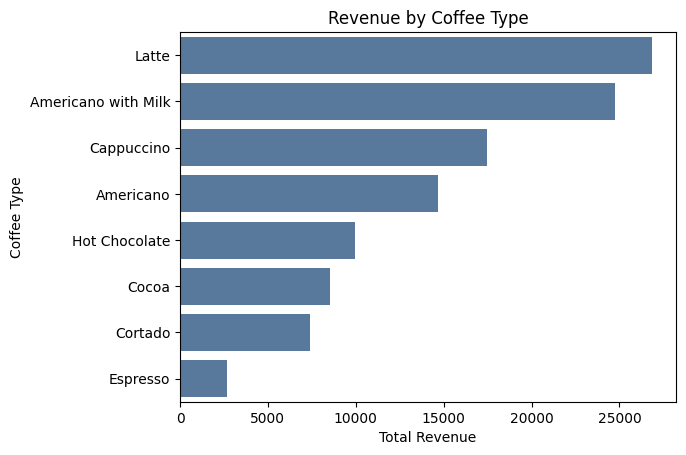

In [7]:
top = (df.groupby('coffee_name', dropna=False)['money']
             .sum().sort_values(ascending=False))
sns.barplot(x=top.values, y=top.index, orient='h', color='#4C78A8')
plt.title('Revenue by Coffee Type')
plt.xlabel('Total Revenue')
plt.ylabel('Coffee Type')
plt.show()

- Latte and Americano with milk have generated revenue beyond other coffee varieties. As we examined in the EDA section, these two coffee types were also the best-selling coffees. 

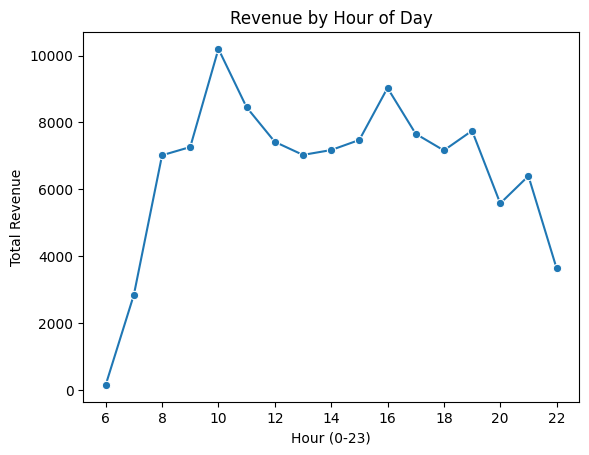

In [8]:
hourly = df.groupby('hour_of_day')['money'].sum().sort_index()
sns.lineplot(x=hourly.index, y=hourly.values, marker='o')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Total Revenue')
plt.xticks(range(6,24,2))
plt.show()

- It appears that one pickup is made between 10 a.m. and 12 p.m. and another pickup is made between 3 p.m. and 5 p.m. Sales are significantly higher during these hours than at other times.

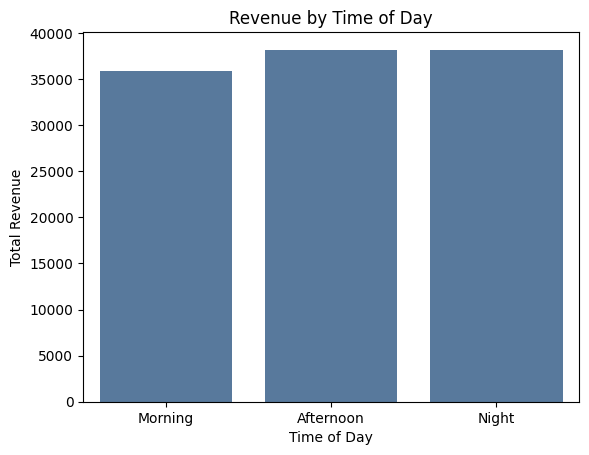

In [9]:
tod = df.groupby('Time_of_Day')['money'].sum().sort_values(ascending=True)
sns.barplot(x=tod.index, y=tod.values, color='#4C78A8')
plt.title('Revenue by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue')
plt.show()

- This bar chart clearly shows us the time periods during the day when the previous hour's total revenue was generated.

In [17]:
fig = px.sunburst(df, path=['Time_of_Day', 'coffee_name'], values='money',
                 title='Revenue Hierarchy: Time of Day > Coffe',
                 color='Time_of_Day')
fig.update_layout(margin=dict(l=20,r=20,t=60,b=20))
fig.show()

- We can easily see how much money is made from different types of coffee throughout the day in this table. Generally, Latte and Americano with milk are ordered more frequently throughout the day.
- it is an interactive table, you can see the earned fee by hovering your mouse pointer over the relevant section.

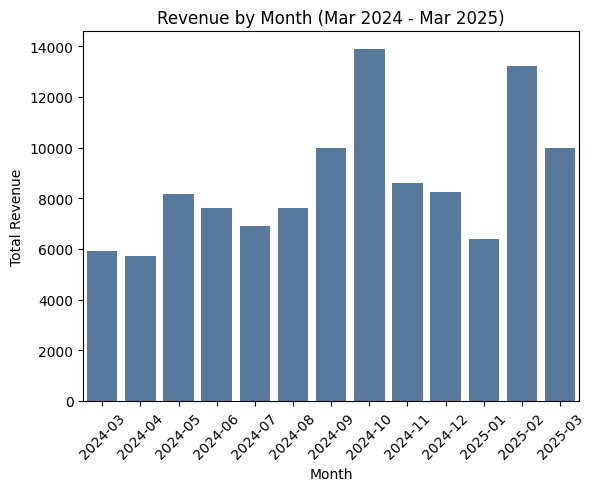

In [11]:
df2 = df.copy()
df2["Date"] = pd.to_datetime(df2["Date"])

# Yıl-Ay kolonu
df2["YearMonth"] = df2["Date"].dt.to_period("M")

# Gruplama
mn = df2.groupby("YearMonth")["money"].sum().reset_index()

# Grafik
sns.barplot(x=mn["YearMonth"].astype(str), y=mn["money"], color="#4C78A8")
plt.title("Revenue by Month (Mar 2024 - Mar 2025)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

- Since the data we have is for the months of March 2024 and March 2025, a monthly income statement only makes sense when it is based on dates. If we had created this table based solely on monthly income, we would have seen higher income directly in March because only three months are taken from 2025 and added to January, February, and March. 

In [12]:
temp = df.copy()
temp['Date'] = pd.to_datetime(temp['Date'])
monthly = temp.set_index('Date')['money'].resample('D').sum().reset_index()
fig = px.line(monthly, x='Date', y='money', title='Revenue Over Time (with Range Slider)')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

- This interactive table allows us to examine income trends by month for 2024-2025. The day with the highest money is October 11, with 836.66.

https://www.kaggle.com/code/batuhanbilgili/coffe-sales-analaysis